In [ ]:
import jax
from jax import numpy as jnp
from matplotlib import pyplot as plt

In [ ]:
A = jnp.diag(jnp.array([1, 2, 3]))


def f(x):
    return x @ A @ x


df = jax.jacrev(f)

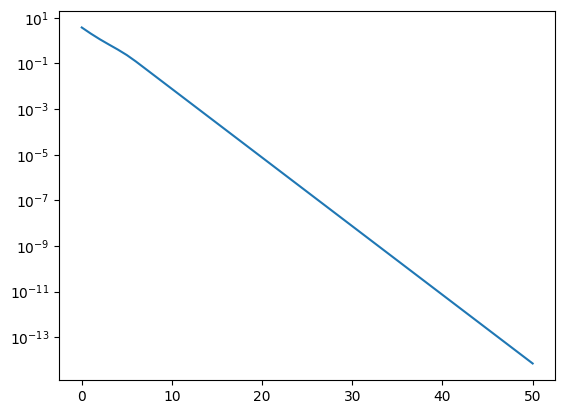

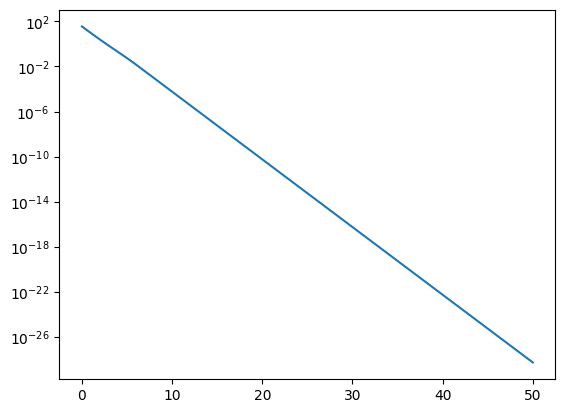

In [ ]:
max_iter = 50

x0 = jnp.array([1, 2, 3], dtype=float)

xs = jnp.full((max_iter + 1, *x0.shape), jnp.inf)
xs = xs.at[0].set(x0)
for k in range(max_iter):
    x = xs[k]
    step = jnp.linalg.lstsq(-df(x).reshape(1, -1), jnp.array([f(x)]))[0]
    xs = xs.at[k + 1].set(x + step)

idx = jnp.arange(max_iter + 1)

plt.plot(idx, jnp.linalg.norm(xs, axis=1))
plt.yscale("log")
plt.show()

plt.plot(idx, jax.vmap(f, 0)(xs))
plt.yscale("log")
plt.show()

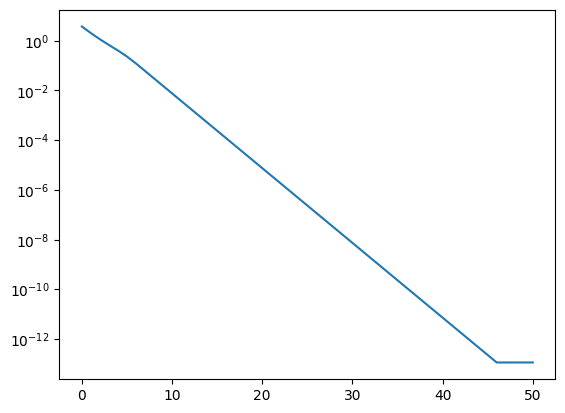

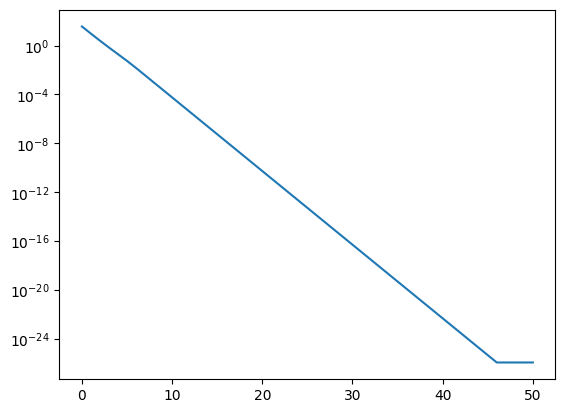

In [ ]:
max_iter = 50

x0 = jnp.array([1, 2, 3], dtype=float)

xs = jnp.full((max_iter + 1, *x0.shape), jnp.inf)
xs = xs.at[0].set(x0)
for k in range(max_iter):
    x = xs[k]
    dfx = df(x)
    step = -f(x) * dfx / jnp.linalg.norm(dfx) ** 2
    xs = xs.at[k + 1].set(x + step)

idx = jnp.arange(max_iter + 1)

plt.plot(idx, jnp.linalg.norm(xs, axis=1))
plt.yscale("log")
plt.show()

plt.plot(idx, jax.vmap(f, 0)(xs))
plt.yscale("log")
plt.show()